### Transfer Learning

Let's try using a pre-trained model to achieve good results even with smaall training dataset. This is called as transfer learning.

We do it by leveraging the trained layers of an existing model and adding your own layers to fit your application. For example, you can:

* just get the convolution layers of one model
* attach some dense layers onto it
* train just the dense network
* evaluate the results

Doing this will allow you to save time building your application because you will essentially skip weeks of training time of very deep networks. You will just use the features it has learned and tweak it for your dataset.

#### Setting up pre-trained model

We will use the convolution layers of the InceptionV3 architecture as base model.
* will set up the imput shape to fit your application.
* pick ad freeze the convolution layers to take advantage of the features it has learned already.
* add dense layers which you will train

In [1]:
# The weights have been pre-downloaded from the following URL:
# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [2]:
#importing libraries

import os
import tensorflow as tf
import matplotlib.pyplot as plt

#setting weights file into a variable.
local_weights_file = 'model\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#initialize the base model
#setting up input shape and removing
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(150,150,3),
    include_top=False,
    weights = None
)

#loading pre-trained model weights 
pre_trained_model.load_weights(local_weights_file)


#freeze the weights of the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [3]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

* observation:

as we see from above, trainable parameters are marked as 0.

let us use up to mixed7 as base model and add to that. This is because the original last layer might be too specialized in what it has learned so it might not translate well into your application. mixed7 on the other hand will be more generalized and we can start with that for application.

In [5]:
#"mixed7" as the last layer of base model

last_layer = pre_trained_model.get_layer("mixed7")
print("last layer of output shape: ", last_layer.output.shape)
last_output = last_layer.output

last layer of output shape:  (None, 7, 7, 768)


#### Adding dense layers for classifier

In [7]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)


#appending dense network to base model
model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

#model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

#### Preparing the dataset

In [12]:
BASE_DIR = "D:\\Tensorflow_Works\\5-Exploring_Larger_Dataset\\cats_dogs_data"

train_dir = os.path.join(BASE_DIR, "train")
validation_dir = os.path.join(BASE_DIR, "test")

#Directory with training cat/dog pictures
train_cat_dir = os.path.join(train_dir, "cats")
train_dog_dir = os.path.join(train_dir, "dogs")

#Directory with validation cat/dog pictures
validation_cat_dir = os.path.join(validation_dir, "cats")
validation_dog_dir = os.path.join(validation_dir, "dogs")

#preparing training and validation datasets

training_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode="binary"
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


When using pretrained models, you should make it a habit to check the documentation for any preprocessing steps. In this case, the InceptionV3 documentation says that the inputs should be scaled to the range [-1,1]. It has a preprocess_input() method that you can use to rescale the inputs. 

In [14]:
#preprocessing function

def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

#applying preprocessing to the datasets
training_dataset_scaled = training_dataset.map(preprocess)
validation_dataset_scaled = validation_dataset.map(preprocess)    

In [15]:
#optimizing datasets for training

training_dataset_final = (training_dataset_scaled
.cache()
.shuffle(1000)
.prefetch(tf.data.AUTOTUNE))

validation_dataset_final = (validation_dataset_scaled
.cache()
.prefetch(tf.data.AUTOTUNE))



#### Including Data Augmentation

In [16]:
#create a model with data augmentation layers

data_augmentation = tf.keras.models.Sequential(
    [
       tf.keras.layers.RandomFlip("horizontal"),
       tf.keras.layers.RandomRotation(0.4),
       tf.keras.layers.RandomTranslation(0.2, 0.2),
       tf.keras.layers.RandomContrast(0.4),
       tf.keras.layers.RandomZoom(0.2) 
    ]
)

In [17]:
#attach the data augmentation model to the base model

inputs = tf.keras.Input(shape=(150,150,3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)

In [18]:
#model compiling

model_with_aug.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

##### Train the model

In [19]:
EPOCHS = 20

#train the model

history=model_with_aug.fit(
    training_dataset_final,
    validation_data = validation_dataset_final,
    epochs = EPOCHS,
    verbose = 2 
)

Epoch 1/20
625/625 - 226s - 361ms/step - accuracy: 0.7501 - loss: 0.5001 - val_accuracy: 0.9542 - val_loss: 0.1142
Epoch 2/20
625/625 - 198s - 317ms/step - accuracy: 0.7903 - loss: 0.4374 - val_accuracy: 0.9488 - val_loss: 0.1436
Epoch 3/20
625/625 - 201s - 322ms/step - accuracy: 0.7986 - loss: 0.4191 - val_accuracy: 0.9582 - val_loss: 0.1143
Epoch 4/20
625/625 - 196s - 313ms/step - accuracy: 0.8027 - loss: 0.4131 - val_accuracy: 0.9592 - val_loss: 0.1067
Epoch 5/20
625/625 - 176s - 281ms/step - accuracy: 0.8109 - loss: 0.3971 - val_accuracy: 0.9534 - val_loss: 0.1265
Epoch 6/20
625/625 - 157s - 252ms/step - accuracy: 0.8156 - loss: 0.3956 - val_accuracy: 0.9588 - val_loss: 0.1038
Epoch 7/20
625/625 - 157s - 251ms/step - accuracy: 0.8191 - loss: 0.3882 - val_accuracy: 0.9472 - val_loss: 0.1482
Epoch 8/20
625/625 - 156s - 249ms/step - accuracy: 0.8177 - loss: 0.3883 - val_accuracy: 0.9572 - val_loss: 0.1136
Epoch 9/20
625/625 - 156s - 249ms/step - accuracy: 0.8197 - loss: 0.3808 - val_a

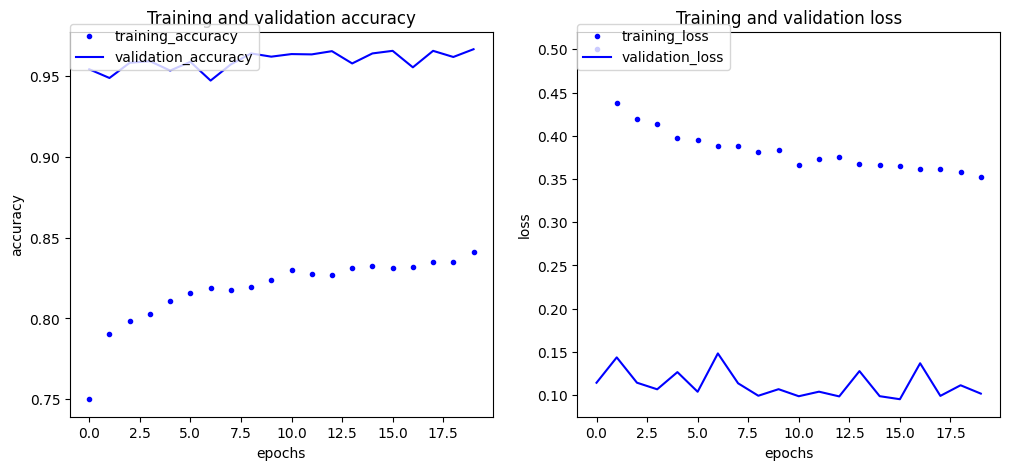

In [22]:
def plot_loss_acc(history):

    plt.subplots(1,2, figsize=(12,5))
    epochs = range(len(history.history['accuracy']))
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, "b.", label="training_accuracy")
    plt.plot(epochs, val_accuracy, "b-", label="validation_accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("Training and validation accuracy")
    plt.legend(loc=[0,0.9])

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, "b.", label="training_loss")
    plt.plot(epochs, val_loss, "b-", label="validation_loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Training and validation loss")
    plt.legend(loc=[0,0.9])

plot_loss_acc(history)    

####